In [0]:
# use google colab
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [1]:
# code reference: https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
import time
import json
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [0]:
# load json file for book genres, retrieved from: https://sites.google.com/eng.ucsd.edu/ucsdbookgraph/books?authuser=0
df = pd.read_json("drive/My Drive/book_genres.json", lines=True)

# load latent factors learned from ALS model
factor = pd.read_csv("drive/My Drive/books.csv")
factor = factor.rename(columns= {"id": "book_id"})
factor = factor[['features', 'book_id']]

In [0]:
book = pd.merge(df, factor, on='book_id')

In [0]:
book

,book_id,genres,features
0,6066819,"{'fiction': 555, 'romance': 23, 'mystery, thri...","[0.0, 0.0103877829387784, 0.0, 0.0, 0.0, 0.0, ..."
1,6066812,"{'fantasy, paranormal': 32, 'young-adult': 8, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0025451045949..."
2,287149,"{'non-fiction': 24, 'history, historical ficti...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,33394837,"{'fantasy, paranormal': 11, 'mystery, thriller...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,89375,"{'non-fiction': 534, 'history, historical fict...","[0.0, 0.0, 0.0, 0.0, 0.009230225346982479, 0.0..."
...,...,...,...
440472,15500943,"{'fiction': 21, 'young-adult': 2, 'romance': 2}","[0.0, 0.0, 0.0, 0.0, 0.0, 0.003282292513176799..."
440473,23252156,"{'mystery, thriller, crime': 12, 'fantasy, par...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
440474,17805813,"{'young-adult': 25, 'fantasy, paranormal': 47,...","[0.12824100255966187, 0.0, 0.0, 0.0, 0.0051859..."
440475,26168430,"{'mystery, thriller, crime': 4, 'children': 1,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [0]:
# get the tag for each book using the genres that has the highest frequency
for i in range(book.shape[0]):
    if book['genres'][i]:
        book['genres'][i] = max(book['genres'][i], key=(lambda x: book['genres'][i][x]))
        print("finished for: {}".format(i))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Streaming output truncated to the last 5000 lines.
finished for: 435333
finished for: 435334
finished for: 435335
finished for: 435336
finished for: 435337
finished for: 435338
finished for: 435339
finished for: 435340
finished for: 435341
finished for: 435342
finished for: 435343
finished for: 435344
finished for: 435345
finished for: 435346
finished for: 435347
finished for: 435348
finished for: 435349
finished for: 435350
finished for: 435351
finished for: 435352
finished for: 435353
finished for: 435354
finished for: 435355
finished for: 435356
finished for: 435357
finished for: 435358
finished for: 435359
finished for: 435360
finished for: 435361
finished for: 435362
finished for: 435363
finished for: 435364
finished for: 435365
finished for: 435366
finished for: 435367
finished for: 435368
finished for: 435370
finished for: 435371
finished for: 435372
finished for: 435373
finished for: 435374
finished for: 435375
finished for: 435376
finished for: 435377
finished for: 435378
fini

In [0]:
# save the file
book.to_csv("drive/My Drive/book_with_genres.csv")

In [172]:
# load the combined file
df = pd.read_csv("drive/My Drive/book_with_genres.csv")
df = df[['book_id', 'genres','features']]
df = df[df.genres != '{}']
df

,book_id,genres,features
0,6066819,fiction,"[0.0, 0.0103877829387784, 0.0, 0.0, 0.0, 0.0, ..."
1,6066812,"fantasy, paranormal","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0025451045949..."
2,287149,non-fiction,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,33394837,"mystery, thriller, crime","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,89375,non-fiction,"[0.0, 0.0, 0.0, 0.0, 0.009230225346982479, 0.0..."
...,...,...,...
440472,15500943,fiction,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.003282292513176799..."
440473,23252156,"mystery, thriller, crime","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
440474,17805813,"fantasy, paranormal","[0.12824100255966187, 0.0, 0.0, 0.0, 0.0051859..."
440475,26168430,"mystery, thriller, crime","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [173]:
# downsampling because t-SNE cannnot perform well with huge dataset
df = df.sample(frac=.05,random_state=2002) # roughly 21k samples
df['genres'].value_counts() 

fiction                                   4517
romance                                   3764
non-fiction                               3174
fantasy, paranormal                       3026
mystery, thriller, crime                  2083
history, historical fiction, biography    1597
comics, graphic                           1181
children                                   934
young-adult                                790
poetry                                     341
Name: genres, dtype: int64

In [174]:
for i in range(20):
    df["feature_{}".format(i)] = 0.0
df.shape

(21407, 23)

In [0]:
def string_to_feature(id):
    string = df['features'].iloc[id][1:-1].replace(" ", "")
    features = list(string.split(","))
    for i in range(20):
        df["feature_{}".format(i)].iloc[id] = features[i]

In [176]:
# use the "features" array to generate seperate features for selected samples
for i in range(df.shape[0]):
    string_to_feature(i)
    print("finished for: {}".format(i))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Streaming output truncated to the last 5000 lines.
finished for: 16408
finished for: 16409
finished for: 16410
finished for: 16411
finished for: 16412
finished for: 16413
finished for: 16414
finished for: 16415
finished for: 16416
finished for: 16417
finished for: 16418
finished for: 16419
finished for: 16420
finished for: 16421
finished for: 16422
finished for: 16423
finished for: 16424
finished for: 16425
finished for: 16426
finished for: 16427
finished for: 16428
finished for: 16429
finished for: 16430
finished for: 16431
finished for: 16432
finished for: 16433
finished for: 16434
finished for: 16435
finished for: 16436
finished for: 16437
finished for: 16438
finished for: 16439
finished for: 16440
finished for: 16441
finished for: 16442
finished for: 16443
finished for: 16444
finished for: 16445
finished for: 16446
finished for: 16447
finished for: 16448
finished for: 16449
finished for: 16450
finished for: 16451
finished for: 16452
finished for: 16453
finished for: 16454
finished 

In [0]:
feat_cols = [ "feature_{}".format(i) for i in range(20) ]
X = pd.DataFrame(df,columns=feat_cols).values

In [183]:
# t-SNE training
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 21407 samples in 0.612s...
[t-SNE] Computed neighbors for 21407 samples in 12.179s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21407
[t-SNE] Computed conditional probabilities for sample 2000 / 21407
[t-SNE] Computed conditional probabilities for sample 3000 / 21407
[t-SNE] Computed conditional probabilities for sample 4000 / 21407
[t-SNE] Computed conditional probabilities for sample 5000 / 21407
[t-SNE] Computed conditional probabilities for sample 6000 / 21407
[t-SNE] Computed conditional probabilities for sample 7000 / 21407
[t-SNE] Computed conditional probabilities for sample 8000 / 21407
[t-SNE] Computed conditional probabilities for sample 9000 / 21407
[t-SNE] Computed conditional probabilities for sample 10000 / 21407
[t-SNE] Computed conditional probabilities for sample 11000 / 21407
[t-SNE] Computed conditional probabilities for sample 12000 / 21407
[t-SNE] Computed conditional probabilities for s

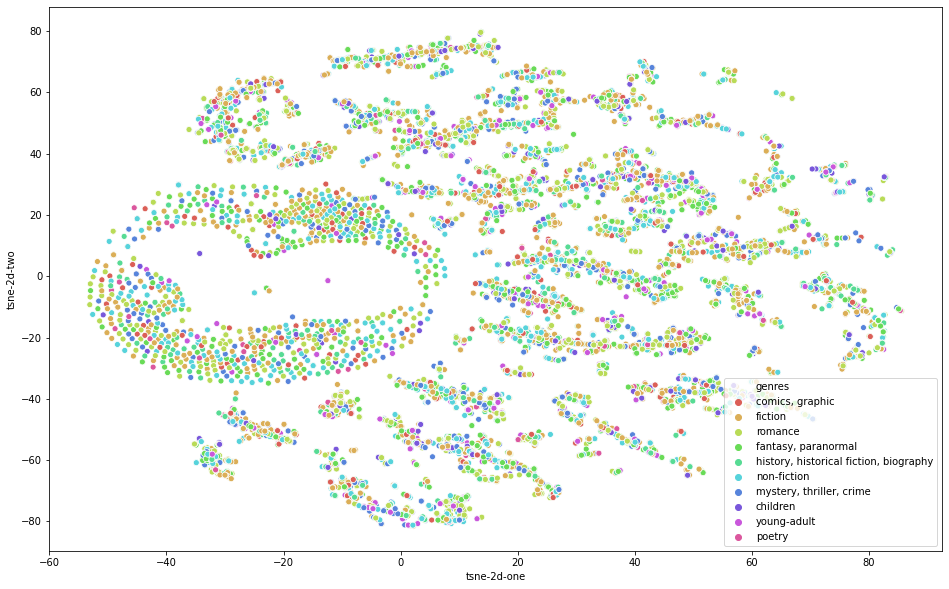

In [184]:
# plots for 1000 iters
df['tsne-2d-one'] = tsne_results[:,1]
df['tsne-2d-two'] = tsne_results[:,0]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="genres",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1
)

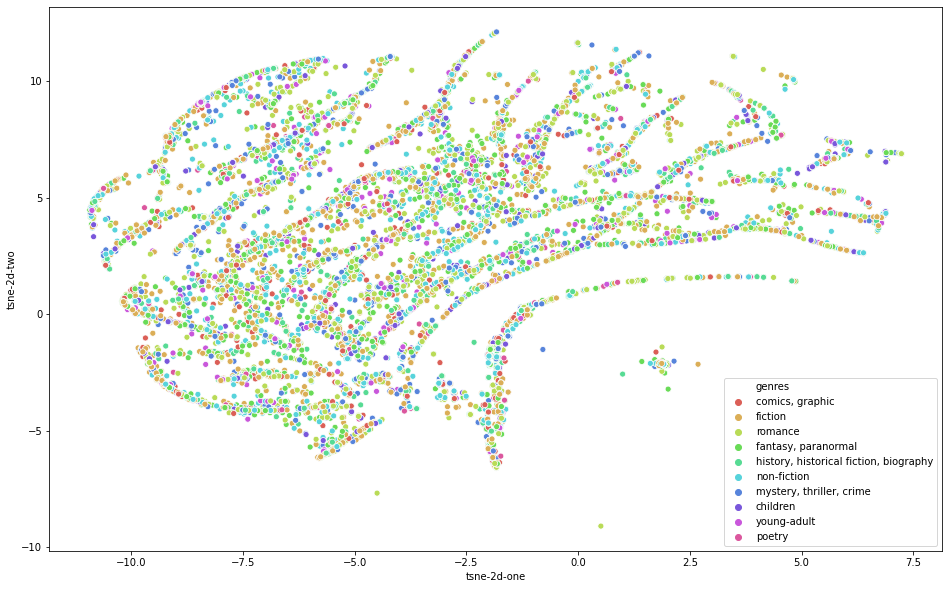

In [182]:
# plots for 300 iters
df['tsne-2d-one'] = tsne_results[:,1]
df['tsne-2d-two'] = tsne_results[:,0]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="genres",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1
)

In [0]:
# only selected 5 genres
df = pd.read_csv("drive/My Drive/book_with_genres.csv")
df = df.loc[df['genres'].isin(['fiction', 'non-fiction', 'comics, graphic', 'children', 'poetry'])]

In [186]:
df.shape

(205046, 4)

In [187]:
# downsampling because t-SNE cannnot perform well with huge dataset
df = df.sample(frac=.15, random_state=2002) # roughly  30k samples
df['genres'].value_counts() 

fiction            13908
non-fiction         9562
comics, graphic     3461
children            2848
poetry               978
Name: genres, dtype: int64

In [188]:
for i in range(20):
    df["feature_{}".format(i)] = 0.0
df.shape

(30757, 24)

In [189]:
# use the "features" array to generate seperate features for selected samples
for i in range(df.shape[0]):
    string_to_feature(i)
    print("finished for: {}".format(i))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Streaming output truncated to the last 5000 lines.
finished for: 25758
finished for: 25759
finished for: 25760
finished for: 25761
finished for: 25762
finished for: 25763
finished for: 25764
finished for: 25765
finished for: 25766
finished for: 25767
finished for: 25768
finished for: 25769
finished for: 25770
finished for: 25771
finished for: 25772
finished for: 25773
finished for: 25774
finished for: 25775
finished for: 25776
finished for: 25777
finished for: 25778
finished for: 25779
finished for: 25780
finished for: 25781
finished for: 25782
finished for: 25783
finished for: 25784
finished for: 25785
finished for: 25786
finished for: 25787
finished for: 25788
finished for: 25789
finished for: 25790
finished for: 25791
finished for: 25792
finished for: 25793
finished for: 25794
finished for: 25795
finished for: 25796
finished for: 25797
finished for: 25798
finished for: 25799
finished for: 25800
finished for: 25801
finished for: 25802
finished for: 25803
finished for: 25804
finished 

In [0]:
feat_cols = [ "feature_{}".format(i) for i in range(20) ]
X = pd.DataFrame(df,columns=feat_cols).values

In [191]:
# t-SNE training
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 30757 samples in 1.584s...
[t-SNE] Computed neighbors for 30757 samples in 26.828s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30757
[t-SNE] Computed conditional probabilities for sample 2000 / 30757
[t-SNE] Computed conditional probabilities for sample 3000 / 30757
[t-SNE] Computed conditional probabilities for sample 4000 / 30757
[t-SNE] Computed conditional probabilities for sample 5000 / 30757
[t-SNE] Computed conditional probabilities for sample 6000 / 30757
[t-SNE] Computed conditional probabilities for sample 7000 / 30757
[t-SNE] Computed conditional probabilities for sample 8000 / 30757
[t-SNE] Computed conditional probabilities for sample 9000 / 30757
[t-SNE] Computed conditional probabilities for sample 10000 / 30757
[t-SNE] Computed conditional probabilities for sample 11000 / 30757
[t-SNE] Computed conditional probabilities for sample 12000 / 30757
[t-SNE] Computed conditional probabilities for s

In [193]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 30757 samples in 1.596s...
[t-SNE] Computed neighbors for 30757 samples in 26.328s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30757
[t-SNE] Computed conditional probabilities for sample 2000 / 30757
[t-SNE] Computed conditional probabilities for sample 3000 / 30757
[t-SNE] Computed conditional probabilities for sample 4000 / 30757
[t-SNE] Computed conditional probabilities for sample 5000 / 30757
[t-SNE] Computed conditional probabilities for sample 6000 / 30757
[t-SNE] Computed conditional probabilities for sample 7000 / 30757
[t-SNE] Computed conditional probabilities for sample 8000 / 30757
[t-SNE] Computed conditional probabilities for sample 9000 / 30757
[t-SNE] Computed conditional probabilities for sample 10000 / 30757
[t-SNE] Computed conditional probabilities for sample 11000 / 30757
[t-SNE] Computed conditional probabilities for sample 12000 / 30757
[t-SNE] Computed conditional probabilities for s

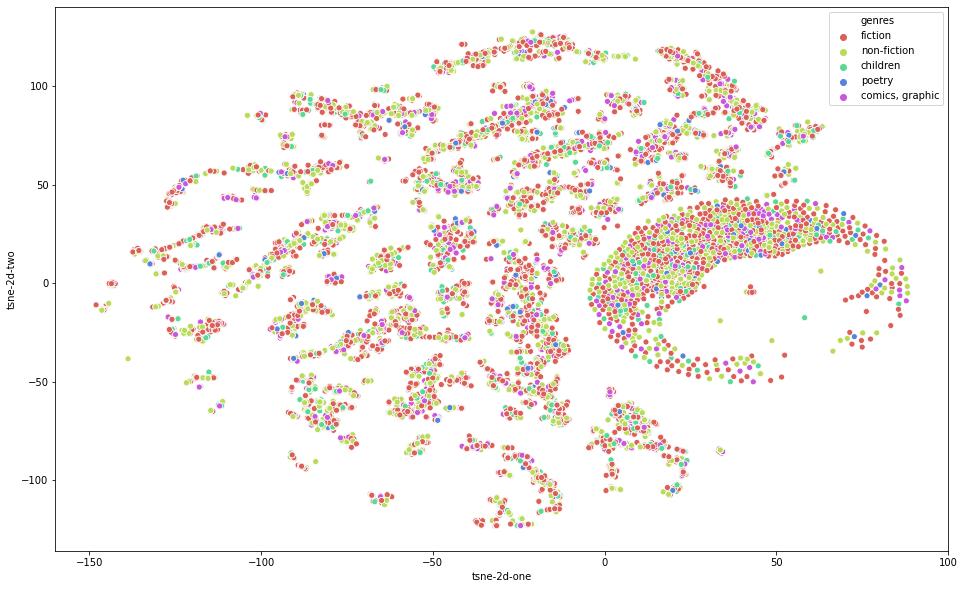

In [194]:
# plots for 2000 iters
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="genres",
    palette=sns.color_palette("hls", 5),
    data=df,
    legend="full",
)

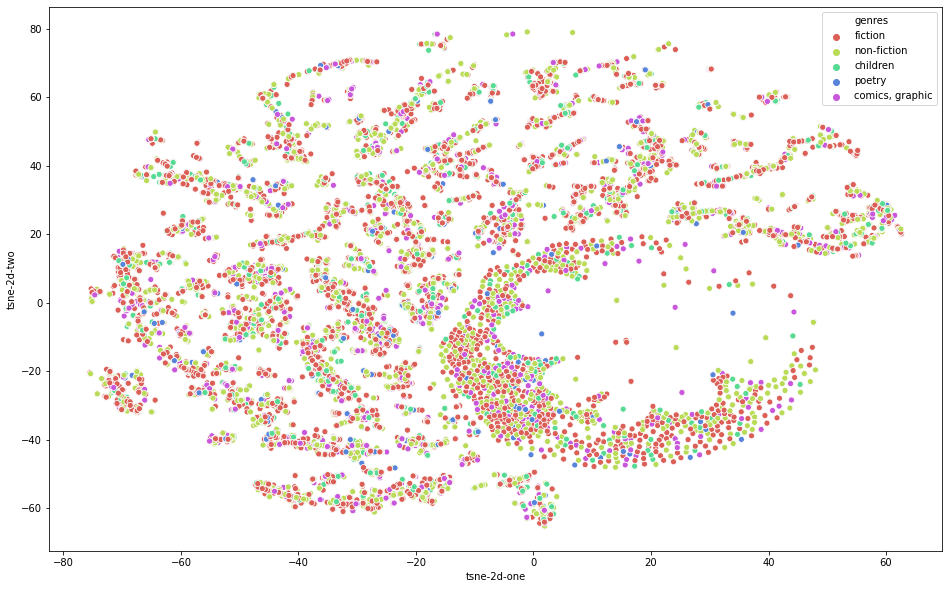

In [192]:
# plots for 1000 iters
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="genres",
    palette=sns.color_palette("hls", 5),
    data=df,
    legend="full",
)

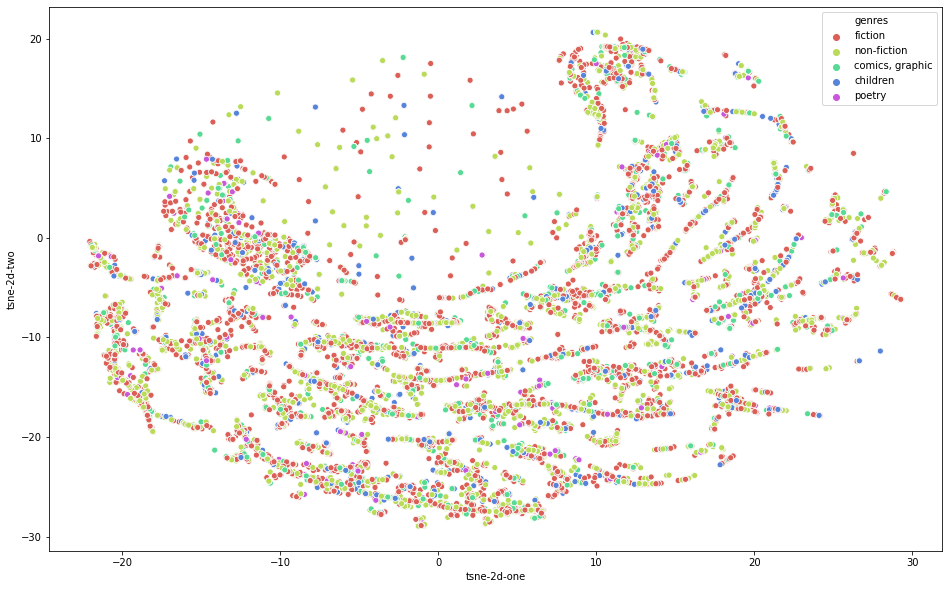

In [144]:
# plots for 300 iters
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="genres",
    palette=sns.color_palette("hls", 5),
    data=df,
    legend="full",
)